In [ ]:
!pip install opendatasets --upgrade --quiet

In [ ]:
import pandas as pd
import opendatasets as od
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_diabetes
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer, SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import ExtraTreesRegressor

***TASK 1***

In [ ]:
#downloading dataset from link
dataset = 'https://www.kaggle.com/datasets/aljarah/xAPI-Edu-Data'
od.download(dataset)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: biezdietnyidaniil
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/aljarah/xAPI-Edu-Data


100%|██████████| 5.54k/5.54k [00:00<00:00, 3.94MB/s]

In [ ]:
#reading dataset
df = pd.read_csv("/content/xAPI-Edu-Data/xAPI-Edu-Data.csv")
df

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


In [ ]:
#drop all non-nominal/-categorical columns
df = df.drop(columns = ['raisedhands','raisedhands','AnnouncementsView','Discussion', 'VisITedResources', 'NationalITy'])
df

,gender,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KuwaIT,lowerlevel,G-04,A,IT,F,Father,Yes,Good,Under-7,M
1,M,KuwaIT,lowerlevel,G-04,A,IT,F,Father,Yes,Good,Under-7,M
2,M,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,L
3,M,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,L
4,M,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,No,Bad,Above-7,L
476,F,Jordan,MiddleSchool,G-08,A,Geology,F,Father,No,Bad,Under-7,M
477,F,Jordan,MiddleSchool,G-08,A,Geology,S,Father,No,Bad,Under-7,M
478,F,Jordan,MiddleSchool,G-08,A,History,F,Father,No,Bad,Above-7,L


In [ ]:
#get all possible values for each column
for i in df.columns.tolist():
   print(f"\n{i}")
   print(df[i].unique())


gender
['M' 'F']

PlaceofBirth
['KuwaIT' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Iraq' 'Palestine' 'Lybia']

StageID
['lowerlevel' 'MiddleSchool' 'HighSchool']

GradeID
['G-04' 'G-07' 'G-08' 'G-06' 'G-05' 'G-09' 'G-12' 'G-11' 'G-10' 'G-02']

SectionID
['A' 'B' 'C']

Topic
['IT' 'Math' 'Arabic' 'Science' 'English' 'Quran' 'Spanish' 'French'
 'History' 'Biology' 'Chemistry' 'Geology']

Semester
['F' 'S']

Relation
['Father' 'Mum']

ParentAnsweringSurvey
['Yes' 'No']

ParentschoolSatisfaction
['Good' 'Bad']

StudentAbsenceDays
['Under-7' 'Above-7']

Class
['M' 'L' 'H']


***label encoding*** - 'PlaceofBirth', 'StageID', 'SectionID', 'Topic','ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'Class'

***one-hot encoding*** - 'gender', 'Relation'

***ordinal encoding*** - 'GradeID', 'Semester', 'StudentAbsenceDays'

In [ ]:
#label encoding
label_enc = ['PlaceofBirth', 'SectionID', 'Topic', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'Class']
df[label_enc] = df[label_enc].apply(lambda x: pd.Categorical(x).codes)
df

,gender,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,4,lowerlevel,G-04,0,7,F,Father,1,1,Under-7,2
1,M,4,lowerlevel,G-04,0,7,F,Father,1,1,Under-7,2
2,M,4,lowerlevel,G-04,0,7,F,Father,0,0,Above-7,1
3,M,4,lowerlevel,G-04,0,7,F,Father,0,0,Above-7,1
4,M,4,lowerlevel,G-04,0,7,F,Father,0,0,Above-7,2
...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,3,MiddleSchool,G-08,0,2,S,Father,0,0,Above-7,1
476,F,3,MiddleSchool,G-08,0,5,F,Father,0,0,Under-7,2
477,F,3,MiddleSchool,G-08,0,5,S,Father,0,0,Under-7,2
478,F,3,MiddleSchool,G-08,0,6,F,Father,0,0,Above-7,1


In [ ]:
#one-hot encoding
one_hot_enc = ['gender', 'Relation']
df = pd.get_dummies(df, columns=one_hot_enc, dtype=np.dtype(int))
df

,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,gender_F,gender_M,Relation_Father,Relation_Mum
0,4,lowerlevel,G-04,0,7,F,1,1,Under-7,2,0,1,1,0
1,4,lowerlevel,G-04,0,7,F,1,1,Under-7,2,0,1,1,0
2,4,lowerlevel,G-04,0,7,F,0,0,Above-7,1,0,1,1,0
3,4,lowerlevel,G-04,0,7,F,0,0,Above-7,1,0,1,1,0
4,4,lowerlevel,G-04,0,7,F,0,0,Above-7,2,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,3,MiddleSchool,G-08,0,2,S,0,0,Above-7,1,1,0,1,0
476,3,MiddleSchool,G-08,0,5,F,0,0,Under-7,2,1,0,1,0
477,3,MiddleSchool,G-08,0,5,S,0,0,Under-7,2,1,0,1,0
478,3,MiddleSchool,G-08,0,6,F,0,0,Above-7,1,1,0,1,0


In [ ]:
#ordinal encoding
ordinal_enc = ['StageID', 'GradeID', 'Semester', 'StudentAbsenceDays']
df['GradeID'] = df['GradeID'].replace({f'G-0{x}' : x for x in range(2,13)})
df['GradeID'] = df['GradeID'].replace({f'G-{x}' : x for x in range(10,13)})
df['StageID'] = df['StageID'].replace({'lowerlevel' : 0,
                                       'MiddleSchool' : 1,
                                       'HighSchool' : 2})
df['Semester'] = df['Semester'].replace({'F' : 1,
                                       'S' : 2})
df['StudentAbsenceDays'] = df['StudentAbsenceDays'].replace({'Under-7' : 0,
                                       'Above-7' : 1})

df

,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,gender_F,gender_M,Relation_Father,Relation_Mum
0,4,0,4,0,7,1,1,1,0,2,0,1,1,0
1,4,0,4,0,7,1,1,1,0,2,0,1,1,0
2,4,0,4,0,7,1,0,0,1,1,0,1,1,0
3,4,0,4,0,7,1,0,0,1,1,0,1,1,0
4,4,0,4,0,7,1,0,0,1,2,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,3,1,8,0,2,2,0,0,1,1,1,0,1,0
476,3,1,8,0,5,1,0,0,0,2,1,0,1,0
477,3,1,8,0,5,2,0,0,0,2,1,0,1,0
478,3,1,8,0,6,1,0,0,1,1,1,0,1,0


In [ ]:
#get all possible values for encoded columns
for i in df.columns.tolist():
   print(f"\n{i}")
   print(df[i].unique())


PlaceofBirth
[ 4 12  0  8 11  3 13  1 10  6  9  2  7  5]

StageID
[0 1 2]

GradeID
[ 4  7  8  6  5  9 12 11 10  2]

SectionID
[0 1 2]

Topic
[ 7  8  0 10  3  9 11  4  6  1  2  5]

Semester
[1 2]

ParentAnsweringSurvey
[1 0]

ParentschoolSatisfaction
[1 0]

StudentAbsenceDays
[0 1]

Class
[2 1 0]

gender_F
[0 1]

gender_M
[1 0]

Relation_Father
[1 0]

Relation_Mum
[0 1]


***TASK 2***

In [ ]:
#loading 2000 records from diabetes
rng = np.random.RandomState(42)

diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target

X = X[:2000]
y = y[:2000]

In [ ]:
def add_missing_values(X_full, y_full):
    n_samples, n_features = X_full.shape

    missing_samples = np.zeros(n_samples, dtype=bool)
    missing_samples[:n_samples] = True

    rng.shuffle(missing_samples)
    missing_features = rng.randint(0, n_features, n_samples)
    X_missing = X_full.copy()
    X_missing[missing_samples, missing_features] = np.nan
    y_missing = y_full.copy()

    return X_missing, y_missing

In [ ]:
#creating missing values
X_missing, y_missing = add_missing_values(X, y)

In [ ]:
N_SPLITS = 4
regressor = RandomForestRegressor(random_state=0)


mses = np.zeros(8)
stds = np.zeros(8)

In [ ]:
def get_full_score(X_full, y_full):
    full_scores = cross_val_score(
        regressor, X_full, y_full, scoring="neg_mean_squared_error", cv=N_SPLITS
    )
    return full_scores.mean(), full_scores.std()

mses[0], stds[0] = get_full_score(X, y)

In [ ]:
def get_scores_for_imputer(imputer, X_missing, y_missing):
    estimator = make_pipeline(imputer, regressor)
    impute_scores = cross_val_score(
        estimator, X_missing, y_missing, scoring="neg_mean_squared_error", cv=N_SPLITS
    )
    return impute_scores

In [ ]:
#KNNImputer
def get_impute_knn_score(X_missing, y_missing):
    imputer = KNNImputer(missing_values=np.nan, add_indicator=True)
    knn_impute_scores = get_scores_for_imputer(imputer, X_missing, y_missing)
    return knn_impute_scores.mean(), knn_impute_scores.std()

mses[1], stds[1] = get_impute_knn_score(
    X_missing, y_missing
)

In [ ]:
#SimpleImputerMean
def get_impute_Simple_mean(X_missing, y_missing):
    imputer = SimpleImputer(missing_values=np.nan, strategy="mean", add_indicator=True)
    mean_impute_scores = get_scores_for_imputer(imputer, X_missing, y_missing)
    return mean_impute_scores.mean(), mean_impute_scores.std()

mses[2], stds[2] = get_impute_Simple_mean(
    X_missing, y_missing
)

In [ ]:
#SimpleImputerMedian
def get_impute_Simple_median(X_missing, y_missing):
    imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent", add_indicator=True)
    median_impute_scores = get_scores_for_imputer(imputer, X_missing, y_missing)
    return median_impute_scores.mean(), median_impute_scores.std()

mses[3], stds[3] = get_impute_Simple_median(
    X_missing, y_missing
)

In [ ]:
#IterativeImputerDefault
#default is BayesianRidge
def get_impute_iterative_default_mean(X_missing, y_missing):
    imputer = IterativeImputer(
        missing_values=np.nan,
        add_indicator=True,
        random_state=0,
        n_nearest_features=3,
        sample_posterior=True,
        verbose = 2,
    )
    iterative_impute_scores = get_scores_for_imputer(imputer, X_missing, y_missing)
    return iterative_impute_scores.mean(), iterative_impute_scores.std()


mses[4], stds[4] = get_impute_iterative_default_mean(
    X_missing, y_missing
)

[IterativeImputer] Completing matrix with shape (331, 10)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.05
[IterativeImputer] Ending imputation round 2/10, elapsed time 0.08
[IterativeImputer] Ending imputation round 3/10, elapsed time 0.11
[IterativeImputer] Ending imputation round 4/10, elapsed time 0.13
[IterativeImputer] Ending imputation round 5/10, elapsed time 0.17
[IterativeImputer] Ending imputation round 6/10, elapsed time 0.20
[IterativeImputer] Ending imputation round 7/10, elapsed time 0.25
[IterativeImputer] Ending imputation round 8/10, elapsed time 0.28
[IterativeImputer] Ending imputation round 9/10, elapsed time 0.30
[IterativeImputer] Ending imputation round 10/10, elapsed time 0.33
[IterativeImputer] Completing matrix with shape (111, 10)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.02
[IterativeImputer] Ending imputation round 2/10, elapsed time 0.03
[IterativeImputer] Ending imputation round 3/10, elapsed time 0.05
[IterativeIm

In [ ]:
#IterativeImputerDefault with another initial strategy 'median'
def get_impute_iterative_default_median(X_missing, y_missing):
    imputer = IterativeImputer(
        missing_values=np.nan,
        add_indicator=True,
        random_state=0,
        n_nearest_features=3,
        sample_posterior=True,
        initial_strategy = 'median',
        verbose = 2,
    )
    iterative_impute_scores = get_scores_for_imputer(imputer, X_missing, y_missing)
    return iterative_impute_scores.mean(), iterative_impute_scores.std()


mses[5], stds[5] = get_impute_iterative_default_median(
    X_missing, y_missing
)

[IterativeImputer] Completing matrix with shape (331, 10)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.03
[IterativeImputer] Ending imputation round 2/10, elapsed time 0.06
[IterativeImputer] Ending imputation round 3/10, elapsed time 0.09
[IterativeImputer] Ending imputation round 4/10, elapsed time 0.13
[IterativeImputer] Ending imputation round 5/10, elapsed time 0.16
[IterativeImputer] Ending imputation round 6/10, elapsed time 0.19
[IterativeImputer] Ending imputation round 7/10, elapsed time 0.24
[IterativeImputer] Ending imputation round 8/10, elapsed time 0.27
[IterativeImputer] Ending imputation round 9/10, elapsed time 0.30
[IterativeImputer] Ending imputation round 10/10, elapsed time 0.34
[IterativeImputer] Completing matrix with shape (111, 10)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.01
[IterativeImputer] Ending imputation round 2/10, elapsed time 0.03
[IterativeImputer] Ending imputation round 3/10, elapsed time 0.04
[IterativeIm

In [ ]:
#IterativeImputerExtraTrees with initial strategy by mean
def get_impute_iterative_extratree_mean(X_missing, y_missing):
    imputer = IterativeImputer(
        estimator = ExtraTreesRegressor(max_features='sqrt', random_state = 0),
        missing_values=np.nan,
        initial_strategy='mean',
        add_indicator=True,
        random_state=0,
        verbose = 2,
    )
    iterative_extratrees_impute_scores = get_scores_for_imputer(imputer, X_missing, y_missing)
    return iterative_extratrees_impute_scores.mean(), iterative_extratrees_impute_scores.std()


mses[6], stds[6] = get_impute_iterative_extratree_mean(
    X_missing, y_missing
)

[IterativeImputer] Completing matrix with shape (331, 10)
[IterativeImputer] Ending imputation round 1/10, elapsed time 1.34
[IterativeImputer] Change: 0.0908707095506529, scaled tolerance: 0.0001987879896572941 
[IterativeImputer] Ending imputation round 2/10, elapsed time 2.69
[IterativeImputer] Change: 0.021924003706765782, scaled tolerance: 0.0001987879896572941 
[IterativeImputer] Ending imputation round 3/10, elapsed time 3.94
[IterativeImputer] Change: 0.020970786154297764, scaled tolerance: 0.0001987879896572941 
[IterativeImputer] Ending imputation round 4/10, elapsed time 5.14
[IterativeImputer] Change: 0.015837867646444688, scaled tolerance: 0.0001987879896572941 
[IterativeImputer] Ending imputation round 5/10, elapsed time 6.39
[IterativeImputer] Change: 0.016609084058503133, scaled tolerance: 0.0001987879896572941 
[IterativeImputer] Ending imputation round 6/10, elapsed time 8.31
[IterativeImputer] Change: 0.015615743068925901, scaled tolerance: 0.0001987879896572941 
[I

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


[IterativeImputer] Completing matrix with shape (111, 10)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.05
[IterativeImputer] Ending imputation round 2/10, elapsed time 0.09
[IterativeImputer] Ending imputation round 3/10, elapsed time 0.14
[IterativeImputer] Ending imputation round 4/10, elapsed time 0.18
[IterativeImputer] Ending imputation round 5/10, elapsed time 0.23
[IterativeImputer] Ending imputation round 6/10, elapsed time 0.27
[IterativeImputer] Ending imputation round 7/10, elapsed time 0.32
[IterativeImputer] Ending imputation round 8/10, elapsed time 0.36
[IterativeImputer] Ending imputation round 9/10, elapsed time 0.40
[IterativeImputer] Ending imputation round 10/10, elapsed time 0.45
[IterativeImputer] Completing matrix with shape (331, 10)
[IterativeImputer] Ending imputation round 1/10, elapsed time 1.22
[IterativeImputer] Change: 0.11416661303644356, scaled tolerance: 0.00018117906039727852 
[IterativeImputer] Ending imputation round 2/10, elapsed

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


[IterativeImputer] Completing matrix with shape (111, 10)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.04
[IterativeImputer] Ending imputation round 2/10, elapsed time 0.08
[IterativeImputer] Ending imputation round 3/10, elapsed time 0.13
[IterativeImputer] Ending imputation round 4/10, elapsed time 0.17
[IterativeImputer] Ending imputation round 5/10, elapsed time 0.21
[IterativeImputer] Ending imputation round 6/10, elapsed time 0.26
[IterativeImputer] Ending imputation round 7/10, elapsed time 0.30
[IterativeImputer] Ending imputation round 8/10, elapsed time 0.35
[IterativeImputer] Ending imputation round 9/10, elapsed time 0.40
[IterativeImputer] Ending imputation round 10/10, elapsed time 0.45
[IterativeImputer] Completing matrix with shape (332, 10)
[IterativeImputer] Ending imputation round 1/10, elapsed time 1.31
[IterativeImputer] Change: 0.10257215490721901, scaled tolerance: 0.0001987879896572941 
[IterativeImputer] Ending imputation round 2/10, elapsed 

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


[IterativeImputer] Completing matrix with shape (110, 10)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.04
[IterativeImputer] Ending imputation round 2/10, elapsed time 0.08
[IterativeImputer] Ending imputation round 3/10, elapsed time 0.13
[IterativeImputer] Ending imputation round 4/10, elapsed time 0.18
[IterativeImputer] Ending imputation round 5/10, elapsed time 0.23
[IterativeImputer] Ending imputation round 6/10, elapsed time 0.27
[IterativeImputer] Ending imputation round 7/10, elapsed time 0.31
[IterativeImputer] Ending imputation round 8/10, elapsed time 0.35
[IterativeImputer] Ending imputation round 9/10, elapsed time 0.39
[IterativeImputer] Ending imputation round 10/10, elapsed time 0.43
[IterativeImputer] Completing matrix with shape (332, 10)
[IterativeImputer] Ending imputation round 1/10, elapsed time 2.01
[IterativeImputer] Change: 0.11451582506864737, scaled tolerance: 0.0001987879896572941 
[IterativeImputer] Ending imputation round 2/10, elapsed 

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


[IterativeImputer] Completing matrix with shape (110, 10)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.07
[IterativeImputer] Ending imputation round 2/10, elapsed time 0.14
[IterativeImputer] Ending imputation round 3/10, elapsed time 0.20
[IterativeImputer] Ending imputation round 4/10, elapsed time 0.26
[IterativeImputer] Ending imputation round 5/10, elapsed time 0.33
[IterativeImputer] Ending imputation round 6/10, elapsed time 0.39
[IterativeImputer] Ending imputation round 7/10, elapsed time 0.46
[IterativeImputer] Ending imputation round 8/10, elapsed time 0.52
[IterativeImputer] Ending imputation round 9/10, elapsed time 0.58
[IterativeImputer] Ending imputation round 10/10, elapsed time 0.64


In [ ]:
#IterativeImputerExtraTrees with initial strategy by median
def get_impute_iterative_extratree_median(X_missing, y_missing):
    imputer = IterativeImputer(
        estimator = ExtraTreesRegressor(max_features='sqrt', random_state = 0),
        missing_values=np.nan,
        initial_strategy='median',
        add_indicator=True,
        random_state=0,
        verbose = 2,
    )
    iterative_extratrees_impute_scores = get_scores_for_imputer(imputer, X_missing, y_missing)
    return iterative_extratrees_impute_scores.mean(), iterative_extratrees_impute_scores.std()


mses[7], stds[7] = get_impute_iterative_extratree_median(
    X_missing, y_missing
)

[IterativeImputer] Completing matrix with shape (331, 10)
[IterativeImputer] Ending imputation round 1/10, elapsed time 1.25
[IterativeImputer] Change: 0.09669569714323456, scaled tolerance: 0.0001987879896572941 
[IterativeImputer] Ending imputation round 2/10, elapsed time 2.50
[IterativeImputer] Change: 0.01797237066412832, scaled tolerance: 0.0001987879896572941 
[IterativeImputer] Ending imputation round 3/10, elapsed time 3.82
[IterativeImputer] Change: 0.01663702610566896, scaled tolerance: 0.0001987879896572941 
[IterativeImputer] Ending imputation round 4/10, elapsed time 5.79
[IterativeImputer] Change: 0.017645375457194773, scaled tolerance: 0.0001987879896572941 
[IterativeImputer] Ending imputation round 5/10, elapsed time 7.48
[IterativeImputer] Change: 0.01568377704541039, scaled tolerance: 0.0001987879896572941 
[IterativeImputer] Ending imputation round 6/10, elapsed time 8.69
[IterativeImputer] Change: 0.022947272308182873, scaled tolerance: 0.0001987879896572941 
[Ite

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


[IterativeImputer] Completing matrix with shape (111, 10)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.04
[IterativeImputer] Ending imputation round 2/10, elapsed time 0.08
[IterativeImputer] Ending imputation round 3/10, elapsed time 0.13
[IterativeImputer] Ending imputation round 4/10, elapsed time 0.17
[IterativeImputer] Ending imputation round 5/10, elapsed time 0.22
[IterativeImputer] Ending imputation round 6/10, elapsed time 0.26
[IterativeImputer] Ending imputation round 7/10, elapsed time 0.30
[IterativeImputer] Ending imputation round 8/10, elapsed time 0.34
[IterativeImputer] Ending imputation round 9/10, elapsed time 0.39
[IterativeImputer] Ending imputation round 10/10, elapsed time 0.43
[IterativeImputer] Completing matrix with shape (331, 10)
[IterativeImputer] Ending imputation round 1/10, elapsed time 1.25
[IterativeImputer] Change: 0.10952872467158654, scaled tolerance: 0.00018117906039727852 
[IterativeImputer] Ending imputation round 2/10, elapsed

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


[IterativeImputer] Completing matrix with shape (111, 10)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.04
[IterativeImputer] Ending imputation round 2/10, elapsed time 0.08
[IterativeImputer] Ending imputation round 3/10, elapsed time 0.12
[IterativeImputer] Ending imputation round 4/10, elapsed time 0.17
[IterativeImputer] Ending imputation round 5/10, elapsed time 0.22
[IterativeImputer] Ending imputation round 6/10, elapsed time 0.26
[IterativeImputer] Ending imputation round 7/10, elapsed time 0.31
[IterativeImputer] Ending imputation round 8/10, elapsed time 0.35
[IterativeImputer] Ending imputation round 9/10, elapsed time 0.39
[IterativeImputer] Ending imputation round 10/10, elapsed time 0.44
[IterativeImputer] Completing matrix with shape (332, 10)
[IterativeImputer] Ending imputation round 1/10, elapsed time 1.27
[IterativeImputer] Change: 0.10351293352247036, scaled tolerance: 0.0001987879896572941 
[IterativeImputer] Ending imputation round 2/10, elapsed 

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


[IterativeImputer] Completing matrix with shape (110, 10)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.05
[IterativeImputer] Ending imputation round 2/10, elapsed time 0.09
[IterativeImputer] Ending imputation round 3/10, elapsed time 0.13
[IterativeImputer] Ending imputation round 4/10, elapsed time 0.18
[IterativeImputer] Ending imputation round 5/10, elapsed time 0.22
[IterativeImputer] Ending imputation round 6/10, elapsed time 0.27
[IterativeImputer] Ending imputation round 7/10, elapsed time 0.31
[IterativeImputer] Ending imputation round 8/10, elapsed time 0.36
[IterativeImputer] Ending imputation round 9/10, elapsed time 0.40
[IterativeImputer] Ending imputation round 10/10, elapsed time 0.45
[IterativeImputer] Completing matrix with shape (332, 10)
[IterativeImputer] Ending imputation round 1/10, elapsed time 1.97
[IterativeImputer] Change: 0.12587519652173254, scaled tolerance: 0.0001987879896572941 
[IterativeImputer] Ending imputation round 2/10, elapsed 

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


[IterativeImputer] Completing matrix with shape (110, 10)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.06
[IterativeImputer] Ending imputation round 2/10, elapsed time 0.13
[IterativeImputer] Ending imputation round 3/10, elapsed time 0.19
[IterativeImputer] Ending imputation round 4/10, elapsed time 0.26
[IterativeImputer] Ending imputation round 5/10, elapsed time 0.32
[IterativeImputer] Ending imputation round 6/10, elapsed time 0.38
[IterativeImputer] Ending imputation round 7/10, elapsed time 0.45
[IterativeImputer] Ending imputation round 8/10, elapsed time 0.51
[IterativeImputer] Ending imputation round 9/10, elapsed time 0.59
[IterativeImputer] Ending imputation round 10/10, elapsed time 0.65


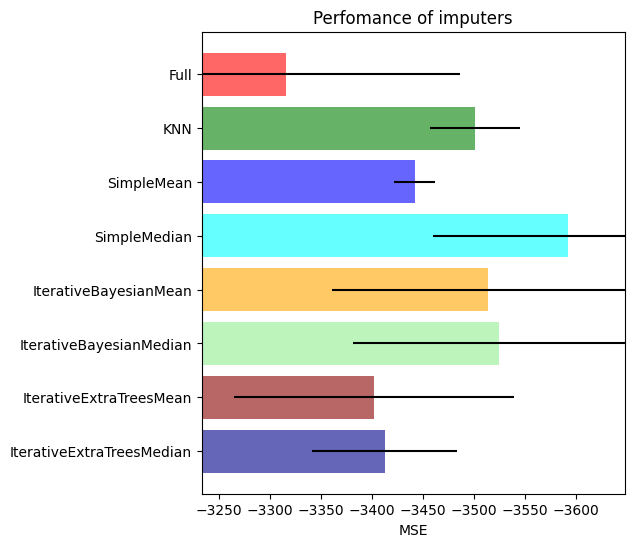

In [ ]:
n_bars = len(mses)
xval = np.arange(n_bars)

colors = ["r", "g", "b", "cyan", "orange", "lightgreen", "darkred", "darkblue"]

# plot diabetes results
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(121)
for j in xval:
    ax1.barh(
        j,
        mses[j],
        xerr=stds[j],
        color=colors[j],
        alpha=0.6,
        align="center",
    )

ax1.set_title("Perfomance of imputers")
ax1.set_xlim(left=np.min(mses) * 0.9, right=np.max(mses) * 1.1)
ax1.set_yticks(xval)
ax1.set_xlabel("MSE")
ax1.invert_yaxis()
ax1.set_yticklabels(['Full', 'KNN', 'SimpleMean', 'SimpleMedian', 'IterativeBayesianMean', 'IterativeBayesianMedian','IterativeExtraTreesMean', 'IterativeExtraTreesMedian'])


plt.show()